In [17]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
py.offline.init_notebook_mode(connected=True)


In [83]:
file = r"data/ecg_tracings.hdf5"
with h5py.File(file, "r") as f:
    x = np.array(f['tracings'])

In [84]:
x.shape

(827, 4096, 12)

In [86]:
x[1].shape

(4096, 12)

In [87]:
x[1]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.43425145,  0.00380549,  0.43805694, ...,  1.20552059,
         1.66197859, -0.76743238],
       [-0.40663559,  0.01588737,  0.42252296, ...,  1.20201614,
         1.65950262, -0.76712383],
       [-0.38198727,  0.02548188,  0.40746919, ...,  1.20299696,
         1.65952942, -0.75982732]])

In [5]:
pd.read_csv(r"data/annotations/gold_standard.csv").head(10)

,1dAVb,RBBB,LBBB,SB,AF,ST
0,0,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [6]:
test_set = x[:10,:,:]

In [105]:
len(test_set)

10

In [40]:
hf = h5py.File('ecg_test.hdf5', 'w')

In [41]:
hf.create_dataset('tracings',data=test_set)

<HDF5 dataset "tracings": shape (10, 4096, 12), type "<f8">

In [42]:
hf.close()

In [82]:
with h5py.File(r"ecg_test.hdf5", "r") as f:
    t = np.array(f['tracings'])

OSError: Unable to open file (unable to open file: name = 'ecg_test.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [145]:
i = 1
np.where(check[i]==max(check[i]))[0][0]

2

In [141]:
check = np.load("dnn_output.npy")
check.shape

(10, 6)

In [142]:
for i in range(check.shape[0]):
    print(np.where(check[i]==max(check[i])))

(array([0], dtype=int64),)
(array([2], dtype=int64),)
(array([4], dtype=int64),)
(array([0, 1, 2, 3, 4, 5], dtype=int64),)
(array([0], dtype=int64),)
(array([4], dtype=int64),)
(array([4], dtype=int64),)
(array([4], dtype=int64),)
(array([3], dtype=int64),)
(array([5], dtype=int64),)


In [70]:
check[6][4]

3.2782555e-06

In [47]:
import streamlit as st

In [48]:
x = st.slider('x')
st.write(x, 'squared is', x * x)

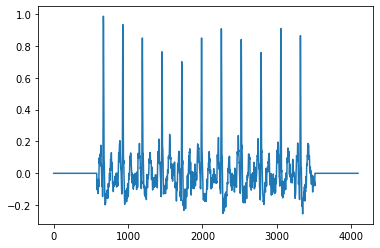

In [8]:
plt.plot(test_set[2].T[1])

In [81]:
test_set[2].T[1]

(4096,)

In [1]:
import neurokit as nk


In [152]:
processed_ecg = nk.ecg_process(ecg, sampling_rate=400, quality_model = None, hrv_features=['time'])

In [41]:
processed_ecg['ECG'].keys()

dict_keys(['R_Peaks', 'Cardiac_Cycles', 'T_Waves', 'P_Waves', 'Q_Waves', 'HRV'])

In [158]:
processed_ecg['ECG']['HRV']['meanNN']

662.75

In [115]:
len(processed_ecg['ECG']['Cardiac_Cycles'].columns)

11

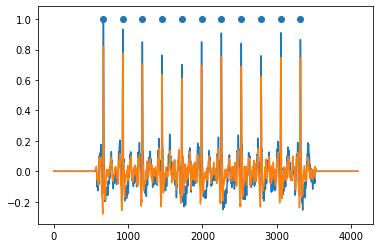

In [52]:
plt.plot(processed_ecg['df'].iloc[:,0])
plt.plot(processed_ecg['df'].iloc[:,1])
plt.scatter(processed_ecg['df'].iloc[:,2])

In [157]:
round(np.mean(processed_ecg['df']['Heart_Rate']))

90

In [107]:
len(test_set[0])

4096

In [151]:
ecg = np.ravel(test_set[2].T[1].reshape(4096,1))

In [26]:
ecg.shape

(4096,)

In [111]:
def plot_r_systole(x):
    fig = make_subplots(rows=3, cols=4)
    fig.update_layout(title = 'View Test ECG Signal', width=1000, height=800)
    for i in range(x.shape[1]):
        
    
    py.offline.iplot(fig)


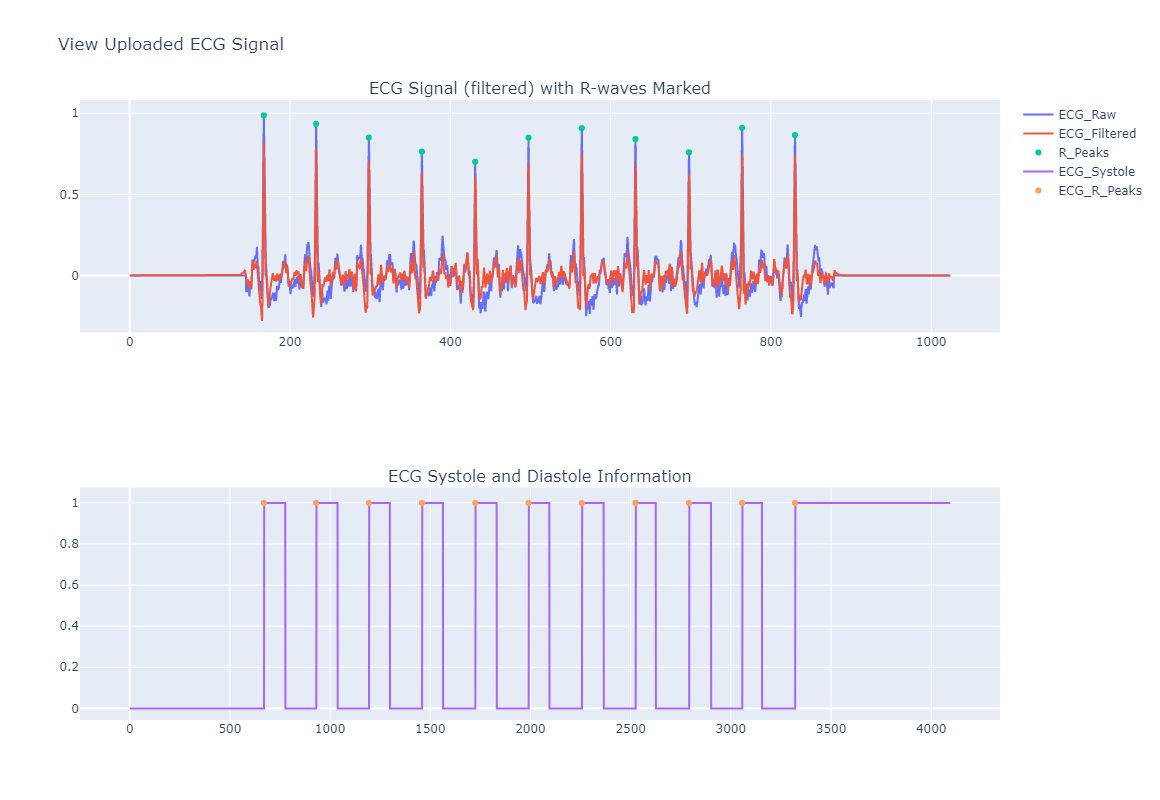

In [154]:
plot_r_systole(processed_ecg['df'])

In [84]:
f = processed_ecg['df'].iloc[:,2]*processed_ecg['df'].iloc[:,1]

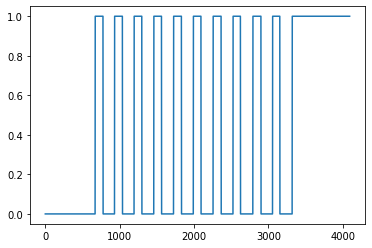

In [93]:
plt.plot(processed_ecg['df'].iloc[:,-1])

In [110]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [110]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [130]:
def plot_cardiac_cycles(df):
    data = []
    for i in range(len(df.columns)):
        trace = go.Scatter(
            x = np.arange(len(df))/400,
            y = df.iloc[:,i],
            mode = 'lines'
        )
        data.append(trace)
    layout = go.Layout(title = "Compare and Match all Cardiac Cycles in the Sample", showlegend=False, 
                       yaxis=dict(title="Amplitude (in Volts)"), xaxis=dict(title="Time (in seconds)"))
    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)
    

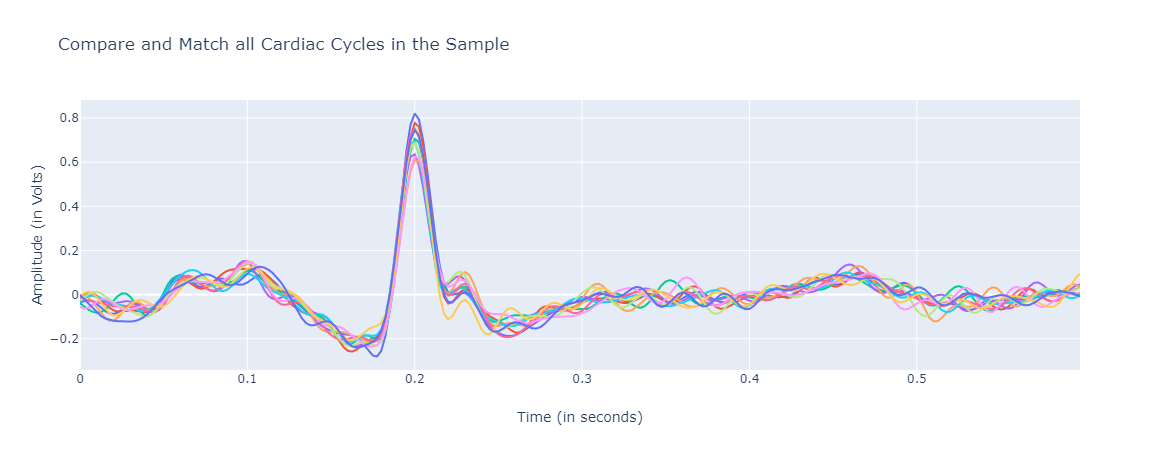

In [131]:
plot_cardiac_cycles(processed_ecg['ECG']['Cardiac_Cycles'])

In [135]:
np.arange(1,-1,-1)

array([1, 0])

In [136]:
pre

True

In [139]:
cond = {0:"First Degree AV Block", 1: "Right Bundle Branch Block", 2:"Left Bundle Branch Block", 
            3:"Sinus Bradycardia", 4:"Atrial Fibrillaton", 5:"Sinus Tachycardia"}
cond[2]

'Left Bundle Branch Block'

In [ ]:
def disp_predict(arr):
    Max = max(arr)
    ind = np.where(arr == Max)
    cond = {0:"First Degree AV Block", 1: "Right Bundle Branch Block", 2:"Left Bundle Branch Block", 
            3:"Sinus Bradycardia", 4:"Atrial Fibrillaton", 5:"Sinus Tachycardia"}
    if Max < 1e-2:
        return "Prognosis is Normal. No anomalies detected."
    else:
        return "Prognosis is " + cond[ind] + ". Consult a doctor at the earliest."
        

In [ ]:
@st.cache
def load():
    
    if uploaded_file is not None:
        with h5py.File(uploaded_file, "r") as f:
            test_data = np.array(f['tracings'])
    

In [6]:
x.shape

(827, 4096, 12)

In [ ]:
for i in columns:
        trace = go.Scatter(
            x = df.index/400,
            y = df.loc[:,i],
            name = i,
            mode = ['lines' if i!='R_Peaks' else 'markers'][0]
        )
        fig.add_trace(trace, row=1, col=1)
    

In [1]:
from model import summ

c:\users\aditi\appdata\local\continuum\anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
s = summ()

In [ ]:
@st.cache
def load():
    st.header("Dataset")
    st.header("Model Summary is as follows: ")
    st.write(summ())  
    st.header("Displayed here are Precision and Recall scores of the training set")
    image = Image.open('/outputs/figures/boxplot_bootstrap_Precision-1.jpg')
    st.image(image, caption="Precision BoxPlots")

In [64]:
f = open("out.txt", "r")
s = f.read()
print(s)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
signal (InputLayer)             (None, 4096, 12)     0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 4096, 64)     12288       signal[0][0]                     
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 4096, 64)     256         conv1d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 4096, 64)     0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv1d_3 (

In [21]:
import pandas as pd

In [75]:
# s = s.replace("_","")
# s = s.replace("=","")
# s = s.split("   ")
# S = np.array([i for i in s if i!=""])



In [81]:
pd.DataFrame(S.reshape(50,4))

,0,1,2,3
0,\nLayer (type),Output Shape,Param #,Connected to
1,\n\nsignal (InputLayer),"(None, 4096, 12)",0,None
2,\n\nconv1d1 (Conv1D),"(None, 4096, 64)",12288,signal[0][0]
3,"\n\nbatchnormalization1 (BatchNor (None, 4096,...",256,conv1d1[0][0],\n\nactivation1 (Activation)
4,"(None, 4096, 64)",0,batchnormalization1[0][0],\n\nconv1d3 (Conv1D)
5,"(None, 4096, 128)",131072,activation1[0][0],"\n\nbatchnormalization2 (BatchNor (None, 4096,..."
6,512,conv1d3[0][0],\n\nactivation2 (Activation),"(None, 4096, 128)"
7,0,batchnormalization2[0][0],\n\ndropout1 (Dropout),"(None, 4096, 128)"
8,0,activation2[0][0],"\n\nmaxpooling1d1 (MaxPooling1D) (None, 1024,...",0
9,activation1[0][0],\n\nconv1d4 (Conv1D),"(None, 1024, 128)",262144


In [35]:
s = 'st.write("1st degree AV block (1dAVb)"), st.write("Right bundle branch block (RBBB)"), st.write("Left bundle branch block (LBBB)"), st.write("Sinus bradycardia (SB)"),st.write("Atrial fibrillation (AF)"), st.write("Sinus tachycardia (ST)")'

In [38]:
s = s.replace("st.write(", "")
s = s.replace(")","")
s

'"1st degree AV block (1dAVb", "Right bundle branch block (RBBB", "Left bundle branch block (LBBB", "Sinus bradycardia (SB","Atrial fibrillation (AF", "Sinus tachycardia (ST"'

In [ ]:
Abnormality
 1dAVb	35,759 (1.5%)	28 (3.4%)
 RBBB	63,528 (2.7%)	34 (4.1%)
 LBBB	39,842 (1.7%)	30 (3.6%)
 SB	37,949 (1.6%)	16 (1.9%)
 AF	41,862 (1.8%)	13 (1.6%)
 ST	49,872 (2.1%)	36 (4.4%)
Age group	 	 
 16−25	155,531 (6.7%)	43 (5.2%)
 26−40	406,239 (17.5%)	122 (14.8%)
 41−60	901.456 (38.8%)	340 (41.1%)
 61−80	729,300 (31.4%)	278 (33.6%)
 ≥81	129,987 (5.6%)	44 (5.3%)
Sex	 	 
 Male	922,780 (39.7%)	321 (38.8%)
 Female	1,399,733 (60.3%)	506 (61.2%)

In [92]:
df = pd.read_csv(r"C:\Users\Aditi\Downloads\automatic-ecg-diagnosis-master\outputs\tables\confusion matrices.csv").drop(["predictor","."], axis=1)

In [95]:
df = df.drop([ 'cardio.', 'cardio..1', 'emerg.', 'emerg..1', 'stud.',
       'stud..1'], axis=1)

In [102]:
df = df.drop([0,1])

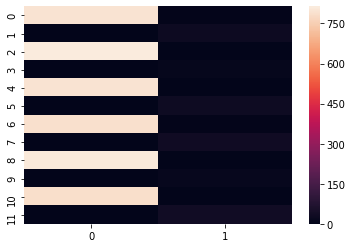

In [120]:
sn.heatmap(d)

In [118]:
df.values

array([['795', '4'],
       ['2', '26'],
       ['814', '0'],
       ['3', '10'],
       ['797', '0'],
       ['0', '30'],
       ['789', '4'],
       ['0', '34'],
       ['808', '3'],
       ['1', '15'],
       ['788', '2'],
       ['1', '36']], dtype=object)

In [121]:
df = pd.DataFrame(d)

In [123]:
df.columns = ['False','True']

In [ ]:
df['index'] = ["1dAVb","RBBB","LBBB","SB", "AF", "ST"]

In [125]:
s = ["1dAVb","RBBB","LBBB","SB", "AF", "ST"]
[s[i//2]+" True" if i%2==0 else s[i//2]+" False" for i in range(12)]

['1dAVb True',
 '1dAVb False',
 'RBBB True',
 'RBBB False',
 'LBBB True',
 'LBBB False',
 'SB True',
 'SB False',
 'AF True',
 'AF False',
 'ST True',
 'ST False']

In [126]:

df['index'] = ['1dAVb True', '1dAVb False', 'RBBB True', 'RBBB False', 'LBBB True', 'LBBB False', 'SB True', 'SB False', 'AF True', 'AF False', 'ST True', 'ST False']

In [129]:
df = df.set_index('index')

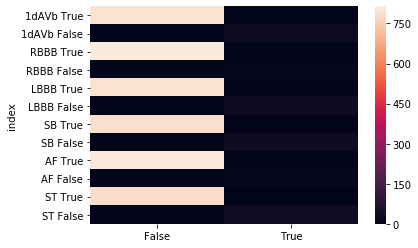

In [132]:
s = sn.heatmap(df)

In [134]:

import seaborn as sn
d = [[795,   4],
       [  2,  26],
       [814,   0],
       [  3,  10],
       [797,   0],
       [  0,  30],
       [789,   4],
       [  0,  34],
       [808,   3],
       [  1,  15],
       [788,   2],
       [  1,  36]]
df = pd.DataFrame(d)
df.columns = ['False','True']
df['index'] = ['1dAVb True', '1dAVb False', 'RBBB True', 'RBBB False', 'LBBB True', 'LBBB False', 'SB True', 'SB False', 'AF True', 'AF False', 'ST True', 'ST False']
df = df.set_index('index')
st.write(df)
st.image(sn.heatmap(df), "Confusion Matrix", use_column_width=True)

array([[795,   4],
       [  2,  26],
       [814,   0],
       [  3,  10],
       [797,   0],
       [  0,  30],
       [789,   4],
       [  0,  34],
       [808,   3],
       [  1,  15],
       [788,   2],
       [  1,  36]], dtype=int64)

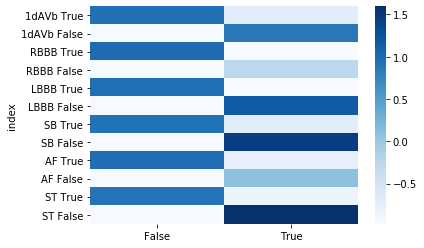

In [141]:
df_norm_col=(df-df.mean())/df.std()
sn.heatmap(df_norm_col, cmap='Blues')